<a href="https://colab.research.google.com/github/DenZhid/TelecommunicationSystemsLabs/blob/main/Lab9/Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Зависимости**

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

from thinkdsp import decorate, zero_pad
from thinkdsp import TriangleSignal, SquareSignal, SawtoothSignal, CubicSignal,  Wave

--2022-05-24 12:39:16--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2022-05-24 12:39:16--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48687 (48K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.55K  --.-KB/s    in 0.008s  

2022-05-24 12:39:16 (5.74 MB/s) - ‘thinkdsp.py’ saved [48687/48687]



# **Упражнение 9.1**

В этом упражнении изучается влияние `diff` и `differentiate` на сигнал. Создайте треугольный сигнал и напечатайте его. Примените `diff` к сигналу и напчатайте резлуьтат. Вычислите спектр треугольного сигнала, примените `differentiate` и напечатайте результат. Преобразуйте спектр обратно в сигнал и напечатайте его. Есть ли различия в воздействии `diff` и `differentiate` на этот сигнал?

**Ход работы:**

Рассмотрим треугольный сигнал.

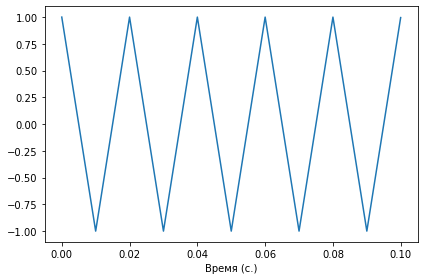

In [2]:
in_wave = TriangleSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Время (с.)')

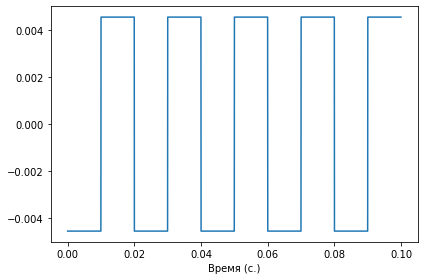

In [3]:
out_wave = in_wave.diff()
out_wave.plot()
decorate(xlabel='Время (с.)')

Результат функции `diff` на треугольную волну представляет собой прямоугольную волну, что объясняет, почему гармоники в прямоугольной волне затухают как $1/f$, а в треугольной волне затухают как $1/f^2$.

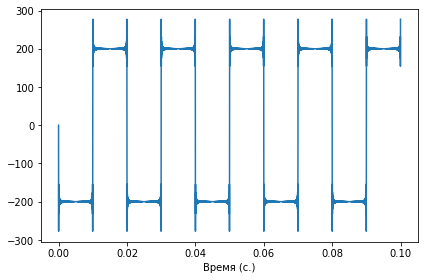

In [4]:
out_wave2 = in_wave.make_spectrum().differentiate().make_wave()
out_wave2.plot()
decorate(xlabel='Время (с.)')

Когда мы берем функцию `differentiate`, мы получаем «звон» вокруг разрывов.

# **Упражнение 9.2**

В данном упражнении изучается влияние `cumsum` и `integrate` на сигнал. Создайте прямоугольный сигнал и напечатайте его. Примените `cumsum` и напечатайте результат. Вычислите спектр прямоугольного сигнала, примените `integrate` и напечатайте результат. Преобразуйте спектр обратно в сигнал и напечатайте его. Есть ли различия в воздействии `cumsum` и `integrate` на этот сигнал?

**Ход работы:**

Рассмотрим прямоугольный сигнал.

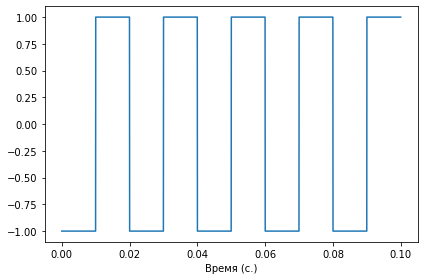

In [5]:
in_wave = SquareSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Время (с.)')

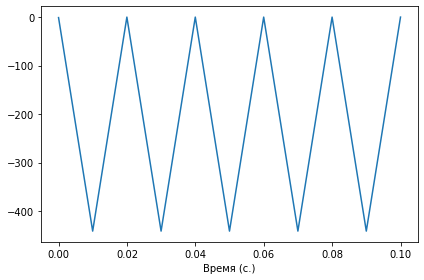

In [6]:
out_wave = in_wave.cumsum()
out_wave.plot()
decorate(xlabel='Время (с.)')

Результат применения функции `cumsum` на прямоугольную волну является треугольная волна.

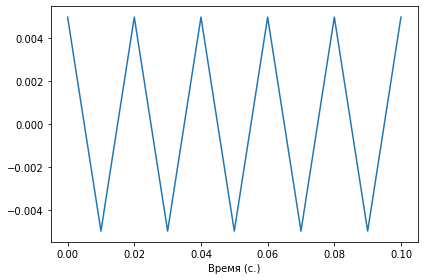

In [7]:
spectrum = in_wave.make_spectrum().integrate()
spectrum.hs[0] = 0
out_wave2 = spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Время (с.)')

Результат функции `integrate` на прямоугольно волне тоже треугольная волна, но с другой амплитудой.

Если мы снимем смещение и нормализуем две волны, они будут визуально похожи.

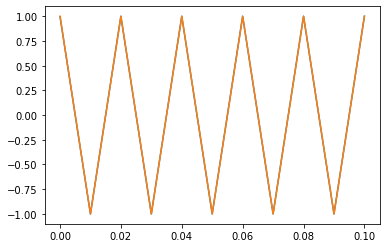

In [8]:
out_wave.unbias()
out_wave.normalize()
out_wave2.normalize()
out_wave.plot()
out_wave2.plot()

Даже численно они будут похожи, но с точностью до 3-ёх цифр после запятой.

In [9]:
out_wave.max_diff(out_wave2)

0.0045351473922902175

# **Упражнение 9.3**

В данном упражнении изучается влияние двойного интегрирования. Создайте пилообразный сигнал, вычислите его спектр, а затем дважды примените `integrate`. Напечатайте результирующий сигнал и его спектр. Какова математическая форма сигнала? Почему он напоминает синусоиду?

**Ход работы:**

Рассмотрим пилообразный сигнал.

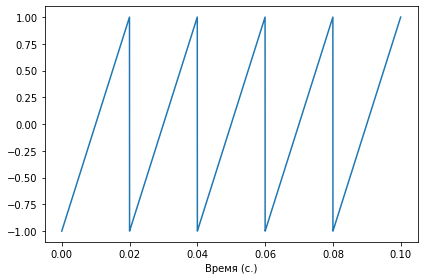

In [10]:
in_wave = SawtoothSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Время (с.)')

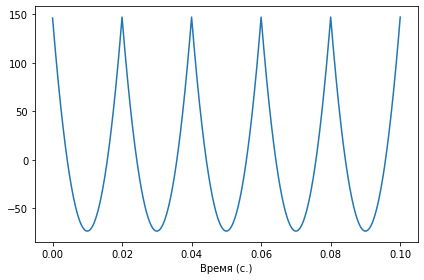

In [11]:
out_wave = in_wave.cumsum()
out_wave.unbias()
out_wave.plot()
decorate(xlabel='Время (с.)')

Первый `cumsum` пилообразного сигнала - это параболы.

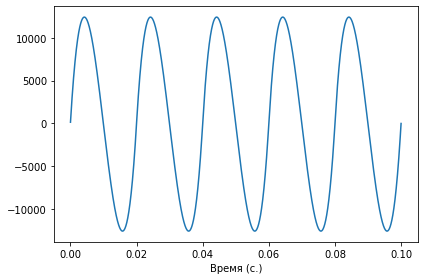

In [12]:
out_wave = out_wave.cumsum()
out_wave.plot()
decorate(xlabel='Время (с.)')

Второй `cumsum` пилообразного сигнала представляет собой кубическую кривую (гиперболы).

In [ ]:
spectrum = in_wave.make_spectrum().integrate().integrate()
spectrum.hs[0] = 0
out_wave2 = spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Время (с.)')

Двойное `intergrate` также привело к кубической кривой. Но в данном варианте результат больше напоминает синусоиду.

# **Упражнение 9.4**

В этом упражнении изучается влияние второй разности и второй производной. Создайте `CubicSignal`, определенный в `thinkdsp`. Вычислите вторую разность, дважды применив `diff`. Как выглядит результат? Вычислите вторую производную, дважды применив `differentiate` к спектру. Похожи ли результаты?

Распечатайте фильтры, соответсвтующие второй разнице и второй производной, и сравните их. Подсказка: для того чтобы получить фильтры в одном масштабе, используйте сигнал с частотой кадров 1.

**Ход работы:**

Рассмотрим кубический сигнал.

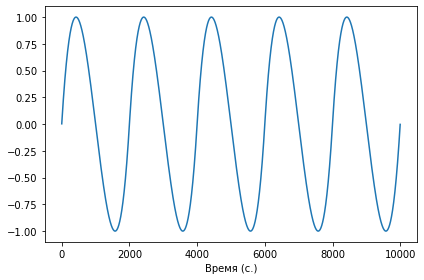

In [14]:
in_wave = CubicSignal(freq=0.0005).make_wave(duration=10000, framerate=1)
in_wave.plot()
decorate(xlabel='Время (с.)')

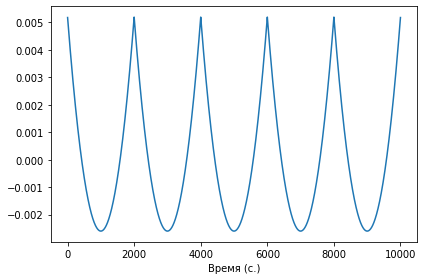

In [15]:
out_wave = in_wave.diff()
out_wave.plot()
decorate(xlabel='Время (с.)')

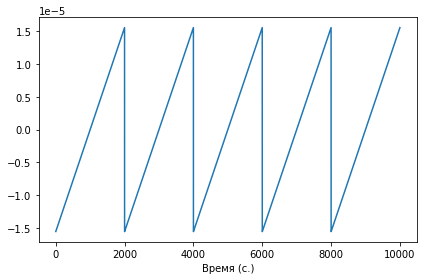

In [16]:
out_wave = out_wave.diff()
out_wave.plot()
decorate(xlabel='Время (с.)')

Первое примение функции `diff` дало параболлу, а второе - пилообразный сигнал.

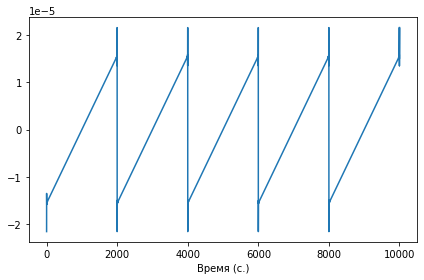

In [18]:
spectrum = in_wave.make_spectrum().differentiate().differentiate()
out_wave2 = spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Время (с.)')

Когда мы выполняем функцию `differentiate` дважды, мы получаем пилообразную форму с некоторым звоном. Проблема в том, что производная параболического сигнала не определена в некоторых точках.

Найдём и распечатаем фильтры, соответсвтующие второй разнице и второй производной

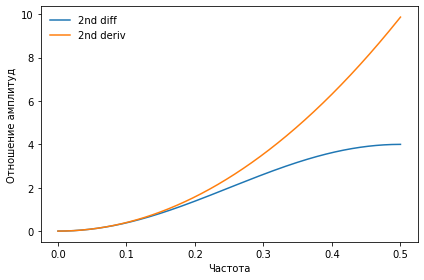

In [19]:
PI2 = np.pi * 2

diff_window = np.array([-1.0, 2.0, -1.0])
padded = zero_pad(diff_window, len(in_wave))
diff_wave = Wave(padded, framerate=in_wave.framerate)
diff_filter = diff_wave.make_spectrum()

deriv_filter = in_wave.make_spectrum()
deriv_filter.hs = (PI2 * 1j * deriv_filter.fs)**2

diff_filter.plot(label='2nd diff')
deriv_filter.plot(label='2nd deriv')

decorate(xlabel='Частота', ylabel='Отношение амплитуд')

Оба фильтра являются фильтрами верхних частот, которые усиливают высокочастотные компоненты. Вторая производная является параболической, поэтому она больше всего усиливает самые высокие частоты. 2-я разность является хорошей аппроксимацией 2-й производной только на самых низких частотах, далее она существенно отклоняется.